## Problem Statement: Retail Sales Performance Analysis

Description:
Visualize sales metrics for a retail store across products and regions.

ExpectedOutcome:
*  KPI: Revenue, Units Sold, Avg. Order Value
*  Bar: Sales by region
*  Line: Monthly trend
*  Pie: Category share




## Data Selection:

While real-world retail data is sensitive and often restricted, this dataset provide the simulation of a market basket dataset, providing insights into customer purchasing behavior and store operations.

here is the link of dataset.
[Dataset](https://www.kaggle.com/datasets/prasad22/retail-transactions-dataset/data)


Use Cases of this Dataset:
Market Basket Analysis: Discover associations between products and uncover

1.   buying patterns
2.  **Customer Segmentation:** Group customers based on purchasing behavior.
3.  **Pricing Optimization:** Optimize pricing strategies and identify opportunities for discounts and promotions.
4.  **Retail Analytics:** Analyze store performance and customer trends.

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("prasad22/retail-transactions-dataset")

print("Path to dataset files:", path)

100%|██████████| 35.6M/35.6M [00:01<00:00, 34.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/prasad22/retail-transactions-dataset/versions/2


## Dataset Preparation

Reading the dataset with help kagglehub library.


In [7]:
import pandas as pd
import os

# The path to the dataset files was printed in the previous cell.
# We can list the files in that directory to find the CSV file.
dataset_path = '/root/.cache/kagglehub/datasets/prasad22/retail-transactions-dataset/versions/2'
file_list = os.listdir(dataset_path)

csv_file = [f for f in file_list if f.endswith('.csv')][0]
csv_path = os.path.join(dataset_path, csv_file)

df = pd.read_csv(csv_path)

# Display the first few rows of the DataFrame
display(df.head())

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,2022-01-21 06:27:29,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,NaN
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6,41.49,Credit Card,Houston,Department Store,True,Professional,Winter,NaN
3,1000000003,2020-10-31 09:59:47,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,Mobile Payment,Chicago,Pharmacy,True,Homemaker,Spring,NaN
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items


In [6]:
##checking if there is anyother file in dataset directory.

import os

dataset_path = '/root/.cache/kagglehub/datasets/prasad22/retail-transactions-dataset/versions/2'
file_list = os.listdir(dataset_path)

print("Files in the dataset directory:")
for file_name in file_list:
    print(file_name)

Files in the dataset directory:
Retail_Transactions_Dataset.csv


## Exploratory Data Analysis

checking the number of columns, column datatype,

In [7]:
df.columns

Index(['Transaction_ID', 'Date', 'Customer_Name', 'Product', 'Total_Items',
       'Total_Cost', 'Payment_Method', 'City', 'Store_Type',
       'Discount_Applied', 'Customer_Category', 'Season', 'Promotion'],
      dtype='object')

In [8]:
df.dtypes

,0
Transaction_ID,int64
Date,object
Customer_Name,object
Product,object
Total_Items,int64
Total_Cost,float64
Payment_Method,object
City,object
Store_Type,object
Discount_Applied,bool


In [9]:
#let's check transaction from which date to which date
print('from ')
print(min(df['Date']))
print('to ')
print(max(df['Date']))

from 
2020-01-01 00:03:54
to 
2024-05-18 19:31:03


In [10]:
correlation_matrix = df.corr(numeric_only=True)
display(correlation_matrix)

,Transaction_ID,Total_Items,Total_Cost,Discount_Applied
Transaction_ID,1.000000,0.000506,-0.000135,-0.000715
Total_Items,0.000506,1.000000,0.000056,-0.001306
Total_Cost,-0.000135,0.000056,1.000000,0.001156
Discount_Applied,-0.000715,-0.001306,0.001156,1.000000


## Key Performance Indicator(KPI)
* Revenue
* Units Sold
* Avg.
* Order Value

### Revenue  Analysis:


In [11]:
## Total Revenue
total_revenue = df['Total_Cost'].sum()
print(f"Total Revenue: ${total_revenue:,.2f}")

Total Revenue: $52,455,220.40


In [12]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
display(df.head())

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion,Year
0,1000000000,2022-01-21 06:27:29,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,NaN,2022
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One),2023
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6,41.49,Credit Card,Houston,Department Store,True,Professional,Winter,NaN,2024
3,1000000003,2020-10-31 09:59:47,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,Mobile Payment,Chicago,Pharmacy,True,Homemaker,Spring,NaN,2020
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items,2020


In [13]:
yearly_revenue = df.groupby('Year')['Total_Cost'].sum()
display(yearly_revenue)

,Total_Cost
Year,
2020,12015550.55
2021,11968910.92
2022,11947032.90
2023,11983528.18
2024,4540197.85


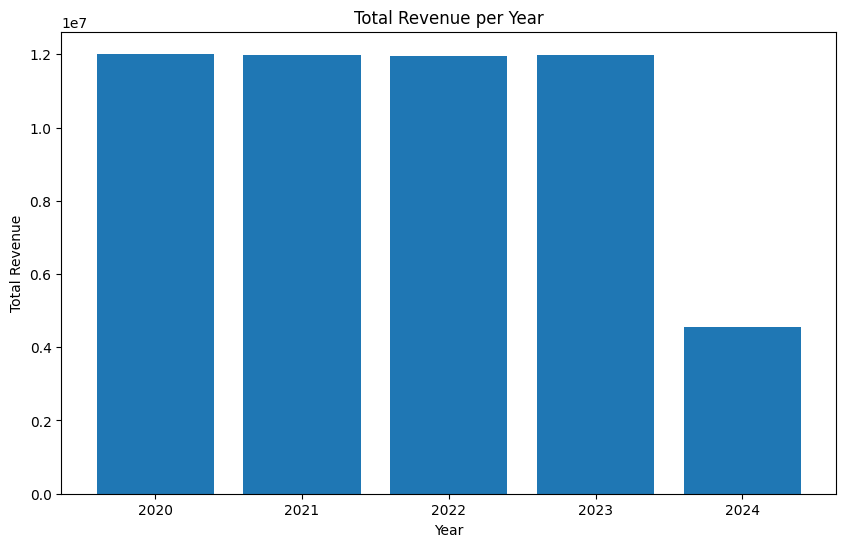

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(yearly_revenue.index, yearly_revenue.values)
plt.title("Total Revenue per Year")
plt.xlabel("Year")
plt.ylabel("Total Revenue")
plt.show()

,Total_Cost
Month,
2020-01,1023565.45
2020-02,953488.19
2020-03,1015781.37
2020-04,988549.87
2020-05,1001696.33
2020-06,988630.18
2020-07,1012661.97
2020-08,1022764.43
2020-09,989218.28


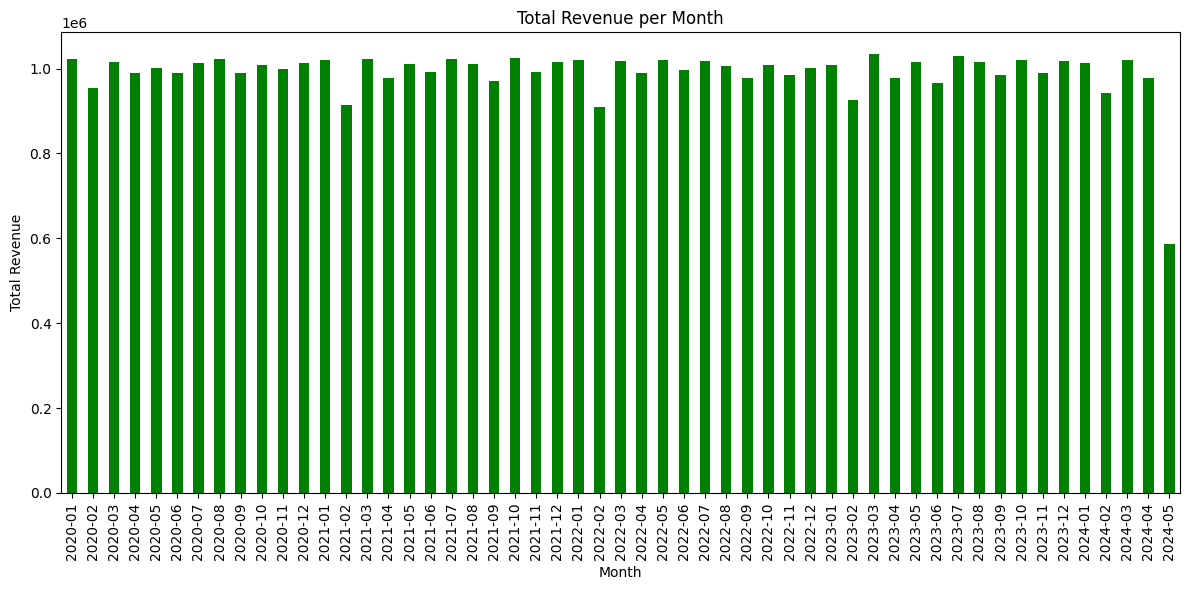

In [21]:
# Calculate and display monthly revenue
monthly_revenue = df.groupby('Month')['Total_Cost'].sum()
display(monthly_revenue)

# Visualize the total revenue per month
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='bar', color='green')
plt.title("Total Revenue per Month")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Unit sold


In [15]:
total_units_sold = df['Total_Items'].sum()
print(f"Total Units Sold: {total_units_sold:,}")


Total Units Sold: 5,495,941


,Total_Items
Year,
2020,1256033
2021,1254914
2022,1252981
2023,1256154
2024,475859


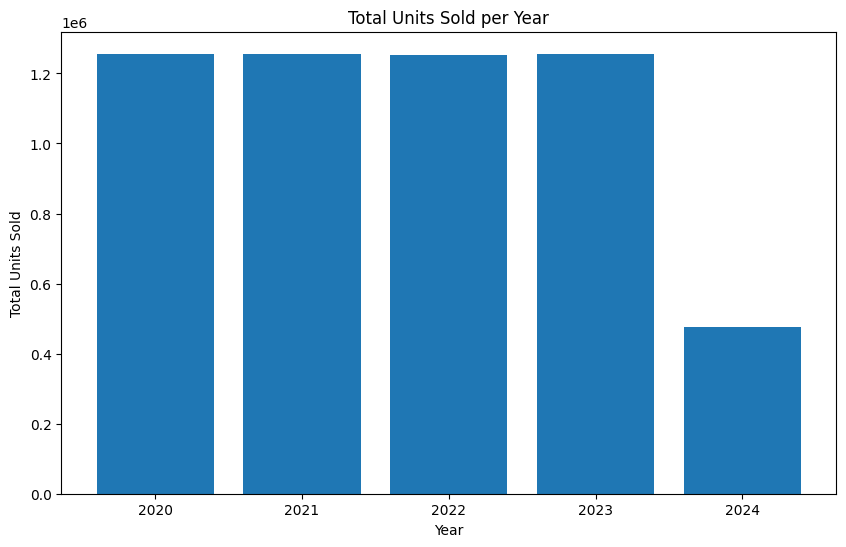

In [16]:
yearly_units_sold = df.groupby('Year')['Total_Items'].sum()
display(yearly_units_sold)

plt.figure(figsize=(10, 6))
plt.bar(yearly_units_sold.index, yearly_units_sold.values)
plt.title("Total Units Sold per Year")
plt.xlabel("Year")
plt.ylabel("Total Units Sold")
plt.show()

,Total_Items
Month,
2020-01,107696
2020-02,99690
2020-03,105577
2020-04,103856
2020-05,104349
2020-06,102958
2020-07,105470
2020-08,106300
2020-09,103670


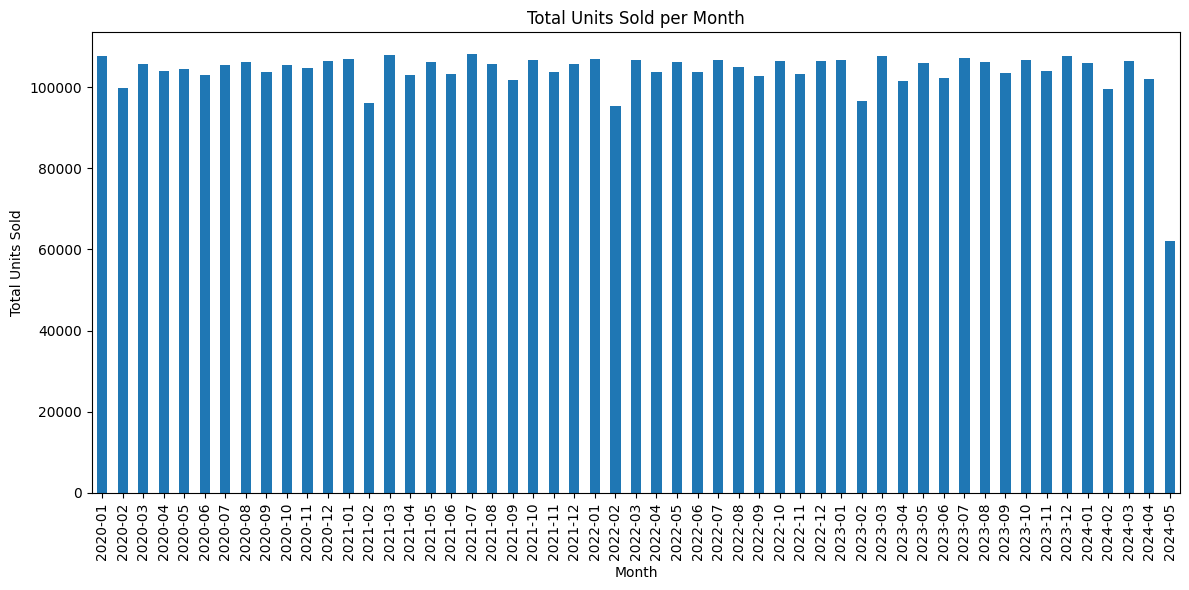

In [20]:
df['Month'] = df['Date'].dt.to_period('M')

# Calculate and display monthly units sold
monthly_units_sold = df.groupby('Month')['Total_Items'].sum()
display(monthly_units_sold)

# Visualize the total units sold per month
plt.figure(figsize=(12, 6))
monthly_units_sold.plot(kind='bar')
plt.title("Total Units Sold per Month")
plt.xlabel("Month")
plt.ylabel("Total Units Sold")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



### Avg unit sold

In [23]:
average_units_sold = df['Total_Items'].mean()
print(f"Average Units Sold: {average_units_sold:,.2f}")

Average Units Sold: 5.50


In [26]:
# Average units sold per day
df['Date_only'] = df['Date'].dt.date
average_units_sold_day = df.groupby('Date_only')['Total_Items'].mean()
print("Average Units Sold per Day:")
display(average_units_sold_day.head())

# Average units sold per month
average_units_sold_month = df.groupby('Month')['Total_Items'].mean()
print("\nAverage Units Sold per Month:")
display(average_units_sold_month.head())

# Average units sold per year
average_units_sold_year = df.groupby('Year')['Total_Items'].mean()
print("\nAverage Units Sold per Year:")
display(average_units_sold_year.head())

(1600,)
Average Units Sold per Day:


,Total_Items
Date_only,
2020-01-01,5.597444
2020-01-02,5.497638
2020-01-03,5.642857
2020-01-04,5.358162
2020-01-05,5.590538



Average Units Sold per Month:


,Total_Items
Month,
2020-01,5.526840
2020-02,5.478075
2020-03,5.462386
2020-04,5.508141
2020-05,5.474764



Average Units Sold per Year:


,Total_Items
Year,
2020,5.491887
2021,5.496824
2022,5.499921
2023,5.498017
2024,5.488380


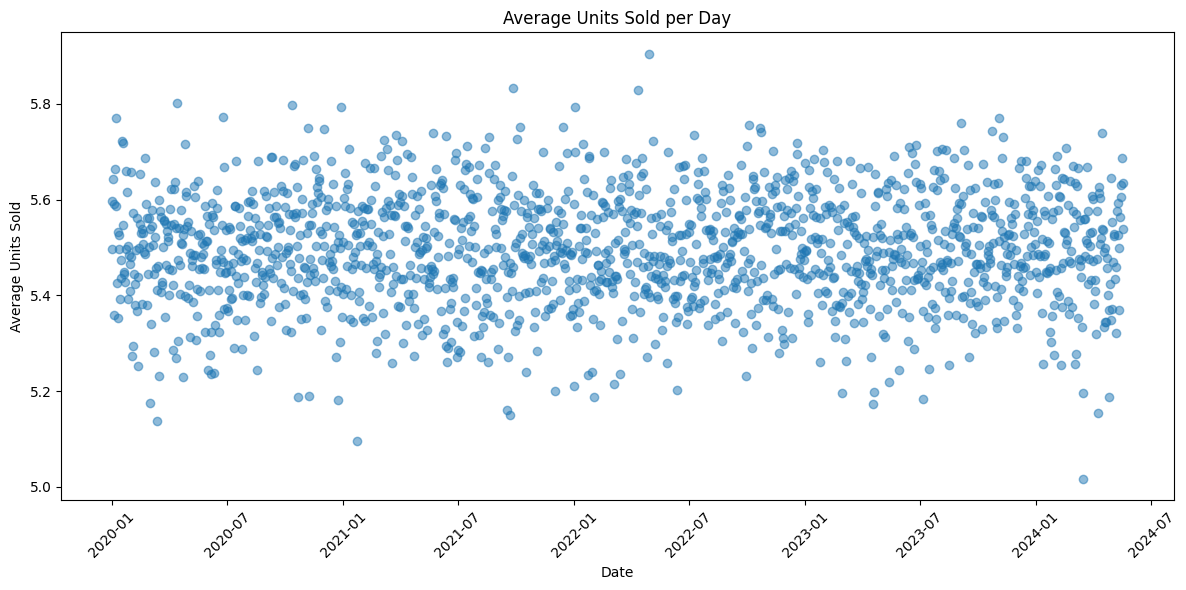

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(average_units_sold_day.index, average_units_sold_day.values, alpha=0.5)
plt.title("Average Units Sold per Day")
plt.xlabel("Date")
plt.ylabel("Average Units Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

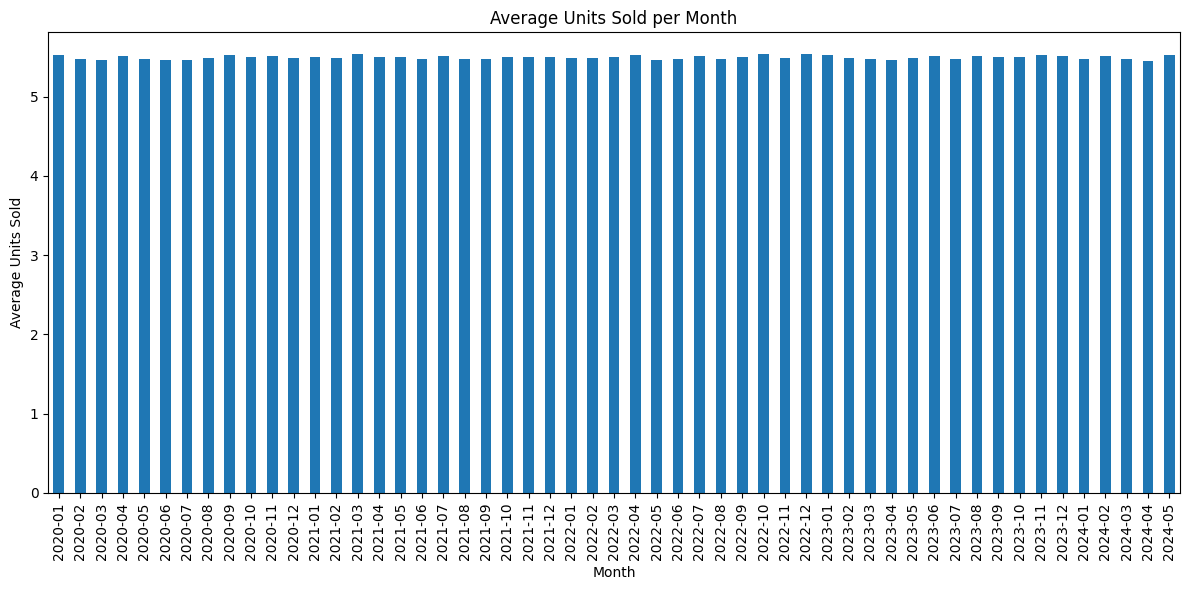

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
average_units_sold_month.plot(kind='bar')
plt.title("Average Units Sold per Month")
plt.xlabel("Month")
plt.ylabel("Average Units Sold")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Sales per Region

In [33]:
# Aggregate sales data by city
sales_by_city = df.groupby('City')['Total_Cost'].sum().reset_index()
print(sales_by_city.columns)
print(sales_by_city.shape)

Index(['City', 'Total_Cost'], dtype='object')
(10, 2)


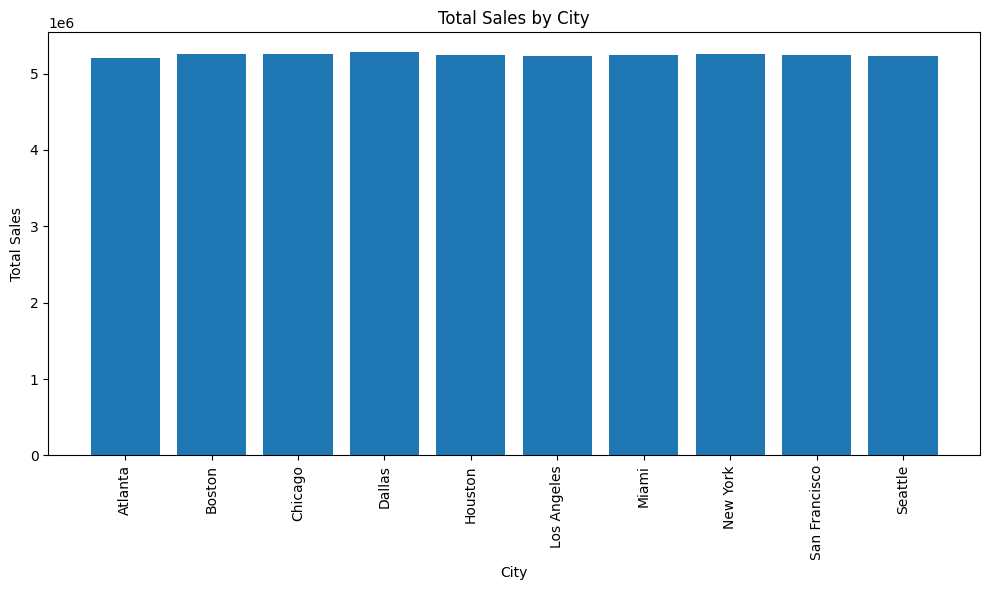

In [34]:
plt.figure(figsize=(10, 6))
plt.bar(sales_by_city['City'], sales_by_city['Total_Cost'])
plt.title("Total Sales by City")
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

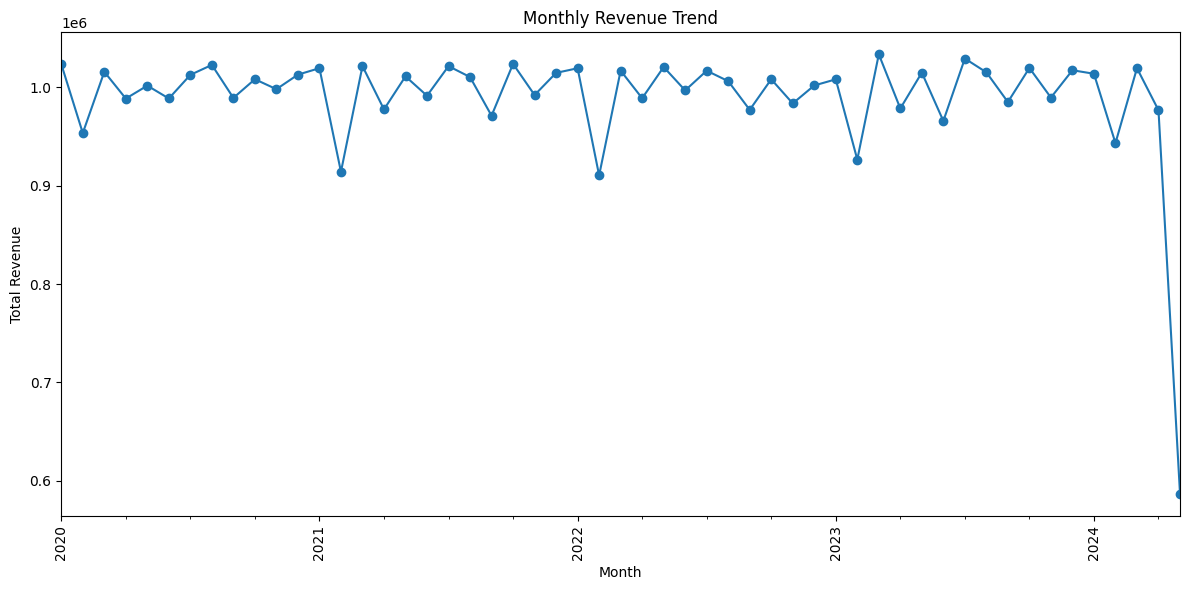

In [36]:
import matplotlib.pyplot as plt

# Visualize monthly revenue trend
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line', marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


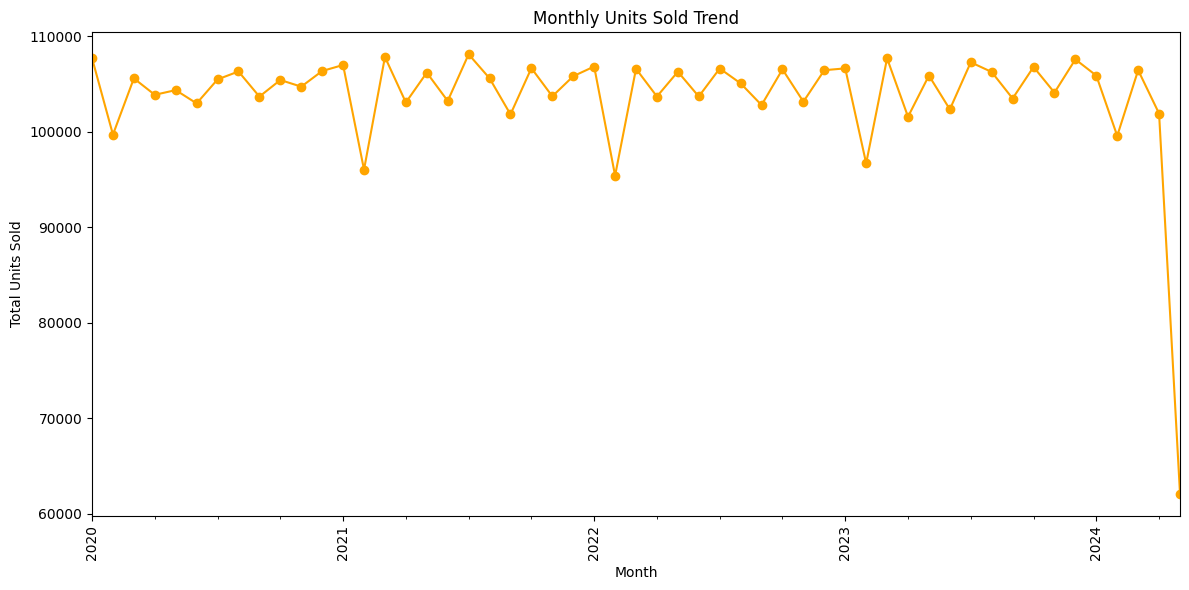

In [37]:
# Visualize monthly units sold trend
plt.figure(figsize=(12, 6))
monthly_units_sold.plot(kind='line', marker='o', color='orange')
plt.title("Monthly Units Sold Trend")
plt.xlabel("Month")
plt.ylabel("Total Units Sold")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Customer Category

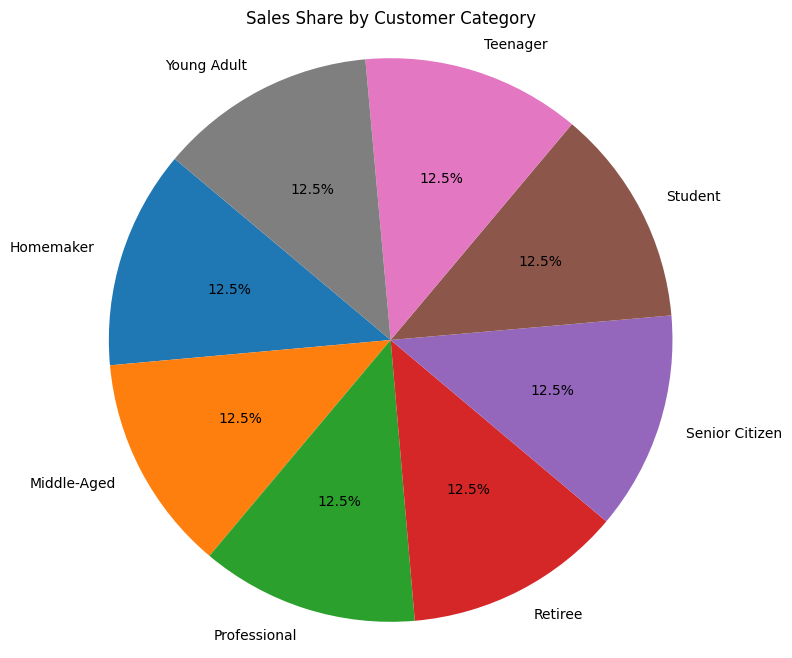

In [38]:
# Calculate sales by customer category
sales_by_customer_category = df.groupby('Customer_Category')['Total_Cost'].sum().reset_index()

# Visualize sales share by customer category using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sales_by_customer_category['Total_Cost'], labels=sales_by_customer_category['Customer_Category'], autopct='%1.1f%%', startangle=140)
plt.title("Sales Share by Customer Category")
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()